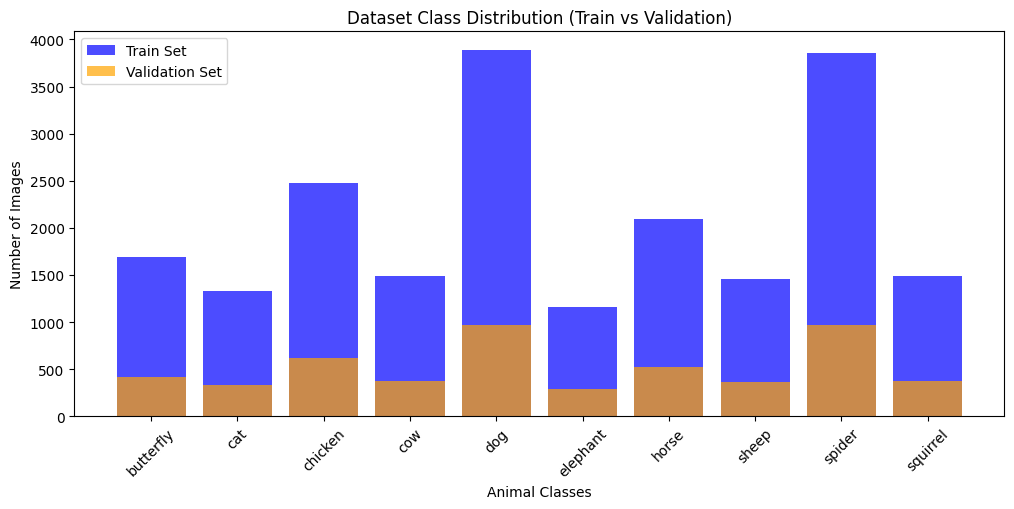

Train Set: {'butterfly': 1689, 'cat': 1334, 'chicken': 2478, 'cow': 1492, 'dog': 3890, 'elephant': 1156, 'horse': 2098, 'sheep': 1456, 'spider': 3856, 'squirrel': 1489}
Validation Set: {'butterfly': 423, 'cat': 334, 'chicken': 620, 'cow': 374, 'dog': 973, 'elephant': 290, 'horse': 525, 'sheep': 364, 'spider': 965, 'squirrel': 373}


In [2]:
import os
import matplotlib.pyplot as plt

# Define dataset paths
train_dir = "../data/train"
val_dir = "../data/val"

# Function to count images per class
def count_images(data_dir):
    return {cls: len(os.listdir(os.path.join(data_dir, cls))) for cls in os.listdir(data_dir)}

# Get class distributions
train_counts = count_images(train_dir)
val_counts = count_images(val_dir)

# Plot class distributions
plt.figure(figsize=(12, 5))
plt.bar(train_counts.keys(), train_counts.values(), color='blue', alpha=0.7, label='Train Set')
plt.bar(val_counts.keys(), val_counts.values(), color='orange', alpha=0.7, label='Validation Set')
plt.xlabel("Animal Classes")
plt.ylabel("Number of Images")
plt.title("Dataset Class Distribution (Train vs Validation)")
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Print number of images per class
print("Train Set:", train_counts)
print("Validation Set:", val_counts)

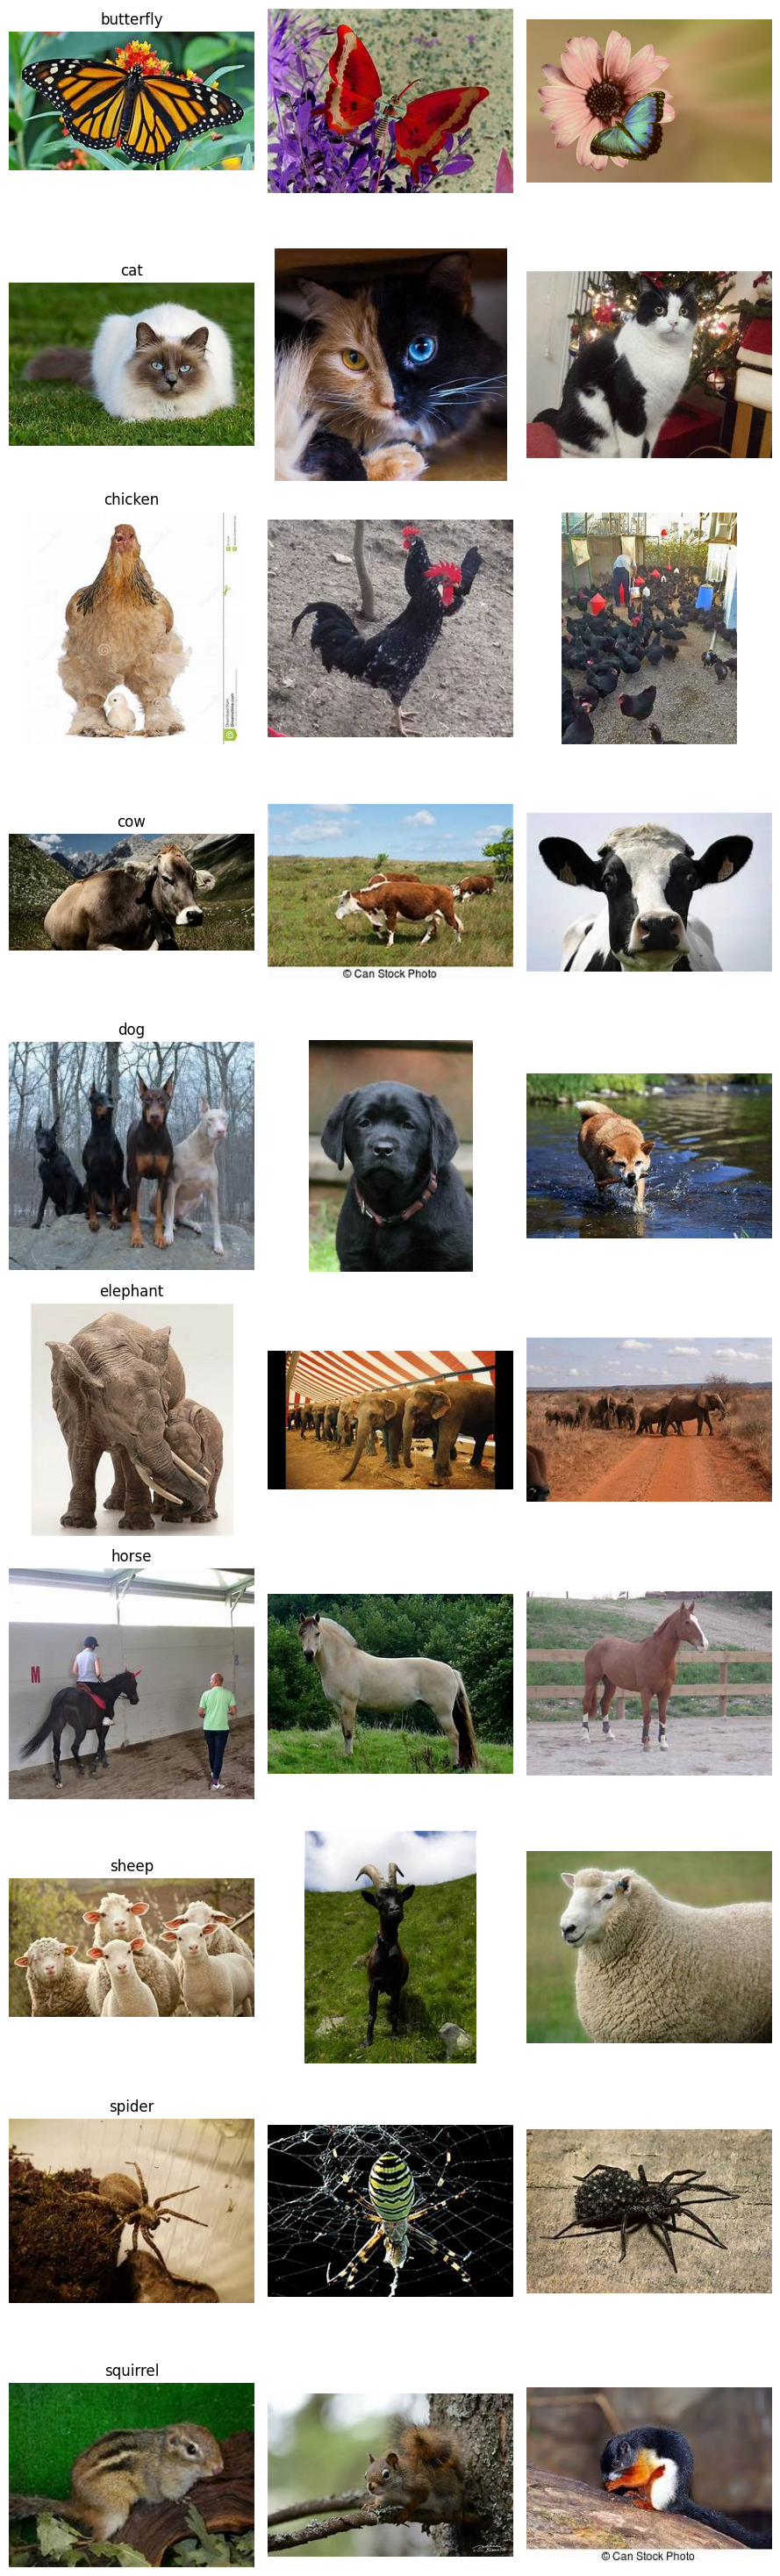

In [3]:
import random
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Function to display sample images from each class
def show_sample_images(data_dir, num_samples=3):
    class_names = os.listdir(data_dir)
    fig, axes = plt.subplots(len(class_names), num_samples, figsize=(num_samples * 3, len(class_names) * 3))

    for i, cls in enumerate(class_names):
        cls_path = os.path.join(data_dir, cls)
        image_files = os.listdir(cls_path)

        for j in range(num_samples):
            img_path = os.path.join(cls_path, random.choice(image_files))
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            axes[i, j].imshow(img)
            axes[i, j].axis("off")
            if j == 0:
                axes[i, j].set_title(cls, fontsize=12)

    plt.tight_layout()
    plt.show()

# Show images from training dataset
show_sample_images(train_dir)


In [4]:
# Identify classes with the least and most images
min_class = min(train_counts, key=train_counts.get)
max_class = max(train_counts, key=train_counts.get)

print(f"📌 Smallest Class: {min_class} ({train_counts[min_class]} images)")
print(f"📌 Largest Class: {max_class} ({train_counts[max_class]} images)")

📌 Smallest Class: elephant (1156 images)
📌 Largest Class: dog (3890 images)


In [5]:
import torch
print(torch.cuda.is_available())


False
